In [1]:
file_path = "/home/fourier/paulo/sam-hq/train/logs/train_output_no_scaling_3.txt"

with open(file_path) as file:
    log = file.read()

In [2]:
import re

pattern = "Averaged stats: training_loss: ([\d|\.]+).{10} loss_mask: ([\d|\.]+).{11}loss_dice: ([\d|\.]+)"
losses = re.findall(pattern, log)

pattern = "Averaged stats: val_iou_0: ([\d|\.]+).{10} val_boundary_iou_0: ([\d|\.]+)"
ious = re.findall(pattern, log)

print(losses, ious, sep='\n')

[('0.0736', '0.0384', '0.0372'), ('0.0299', '0.0176', '0.0132'), ('0.0357', '0.0182', '0.0175'), ('0.0341', '0.0170', '0.0161'), ('0.0478', '0.0224', '0.0230'), ('0.0294', '0.0163', '0.0135'), ('0.0324', '0.0159', '0.0169'), ('0.0226', '0.0153', '0.0069'), ('0.0314', '0.0157', '0.0152'), ('0.0305', '0.0160', '0.0132'), ('0.0262', '0.0148', '0.0111'), ('0.0245', '0.0144', '0.0098')]
[('0.9905', '0.9257'), ('0.9945', '0.9556'), ('0.9950', '0.9591'), ('0.9953', '0.9627'), ('0.9947', '0.9635'), ('0.9952', '0.9641'), ('0.9951', '0.9642'), ('0.9952', '0.9643'), ('0.9956', '0.9636'), ('0.9954', '0.9651'), ('0.9954', '0.9671'), ('0.9957', '0.9666')]


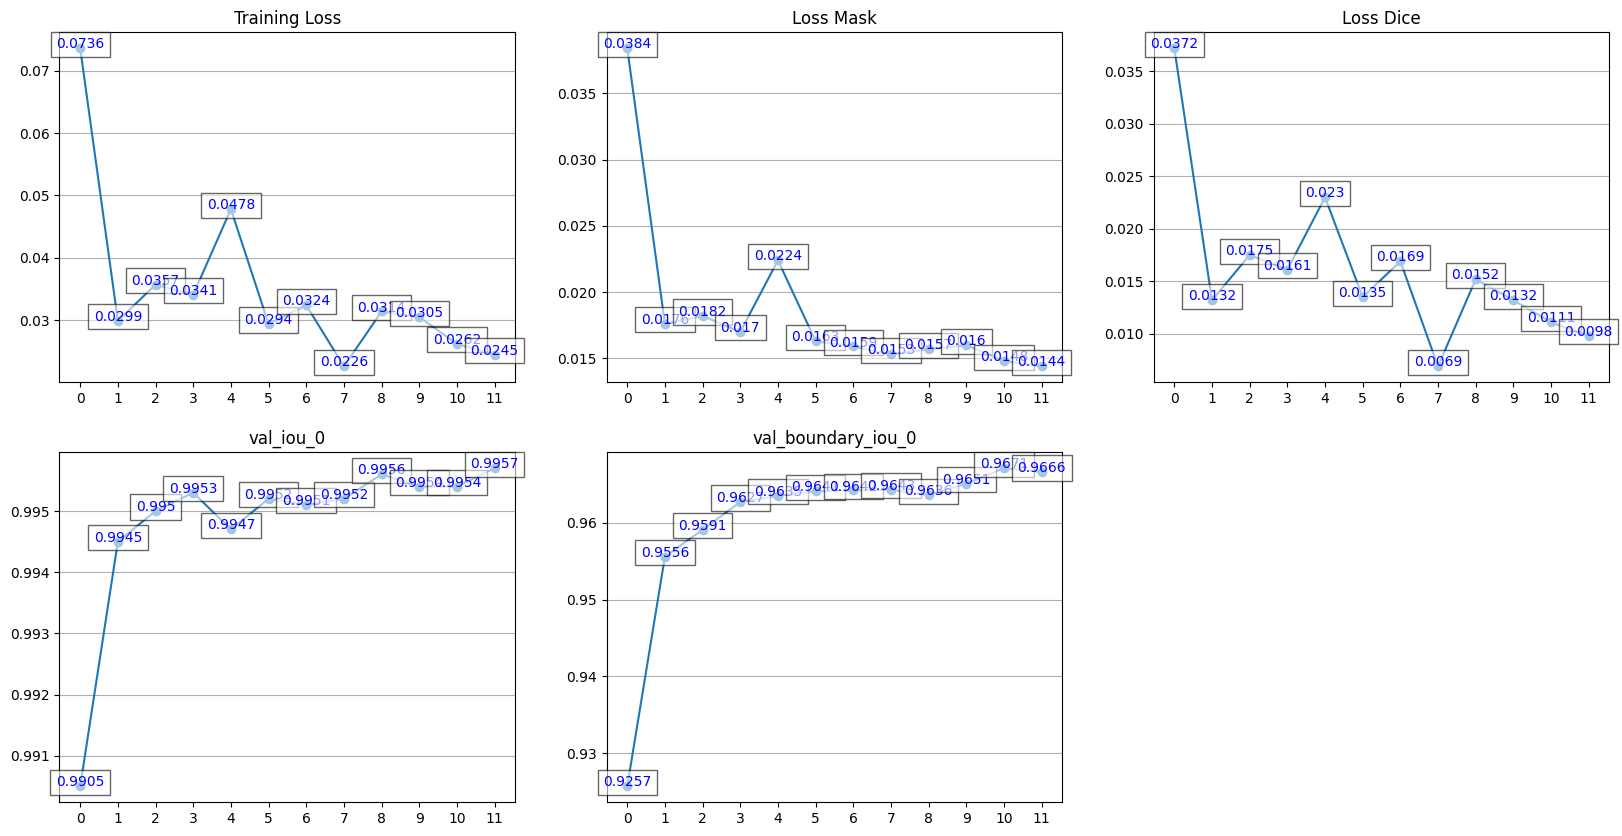

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

def plot(titles, data_points, offset):
    for idx, title in enumerate(titles):
        data = [float(x[idx]) for x in data_points]
        ax = plt.subplot(2, 3, idx + offset)
        plt.plot(data, marker='o')
        plt.title(title)
        plt.grid(axis='y')
        plt.xticks(range(len(data)))
        ax.set_axisbelow(True)
    
        for x, y in enumerate(data):
            label = str(y)
            plt.text(x, y, label, horizontalalignment='center', color='blue', bbox={'facecolor': 'white', 'alpha': 0.6})

plot(["Training Loss", "Loss Mask", "Loss Dice"], losses, 1)
plot(["val_iou_0", "val_boundary_iou_0"], ious, 4)

plt.show()
